In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# seaborn 버전 확인
# 11
sns.__version__

'0.11.0'

In [8]:
def get_font_family():
    """
    시스템 환경에 따른 기본 폰트명을 반환하는 함수
    """
    import platform
    system_name = platform.system()
    # colab 사용자는 system_name이 'Linux'로 확인

    if system_name == "Darwin" :
        font_family = "AppleGothic"
    elif system_name == "Windows":
        font_family = "Malgun Gothic"
    else:
        # Linux
        # colab에서는 runtime을 <꼭> 재시작 해야합니다.
        # 런타임을 재시작 하지 않고 폰트 설치를 하면 기본 설정 폰트가 로드되어 한글이 깨집니다.
        !apt-get update -qq
        !apt-get install fonts-nanum -qq  > /dev/null

        import matplotlib.font_manager as fm

        fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
        font = fm.FontProperties(fname=fontpath, size=9)
        fm._rebuild()
        font_family = "NanumBarunGothic"
    return font_family

In [9]:
get_font_family()

'Malgun Gothic'

In [10]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [11]:
import matplotlib.pyplot as plt
# 시각화를 위한 폰트설정
# 위에서 만든 함수를 통해 시스템 폰트를 불러와서 font_family 라는 변수에 할당합니다.


# ggplot으로 그래프 스타일 설정 >> print(plt.style.available) 
plt.style.use('classic')

# 폰트설정
plt.rc("font", family =get_font_family())

# 마이너스폰트 설정
plt.rc("axes",unicode_minus=False)


# 그래프에 retina display 적용
from IPython.display import set_matplotlib_formats   #주피터노트북이 원해 IPython이었음. 현재는 주피터노트북에 탑재되어 있음.
set_matplotlib_formats("retina")  #shift+ tap # retina display를 지원하면, 그래프가 좀 더 선명하게 보인다.

<AxesSubplot:title={'center':'한글'}>

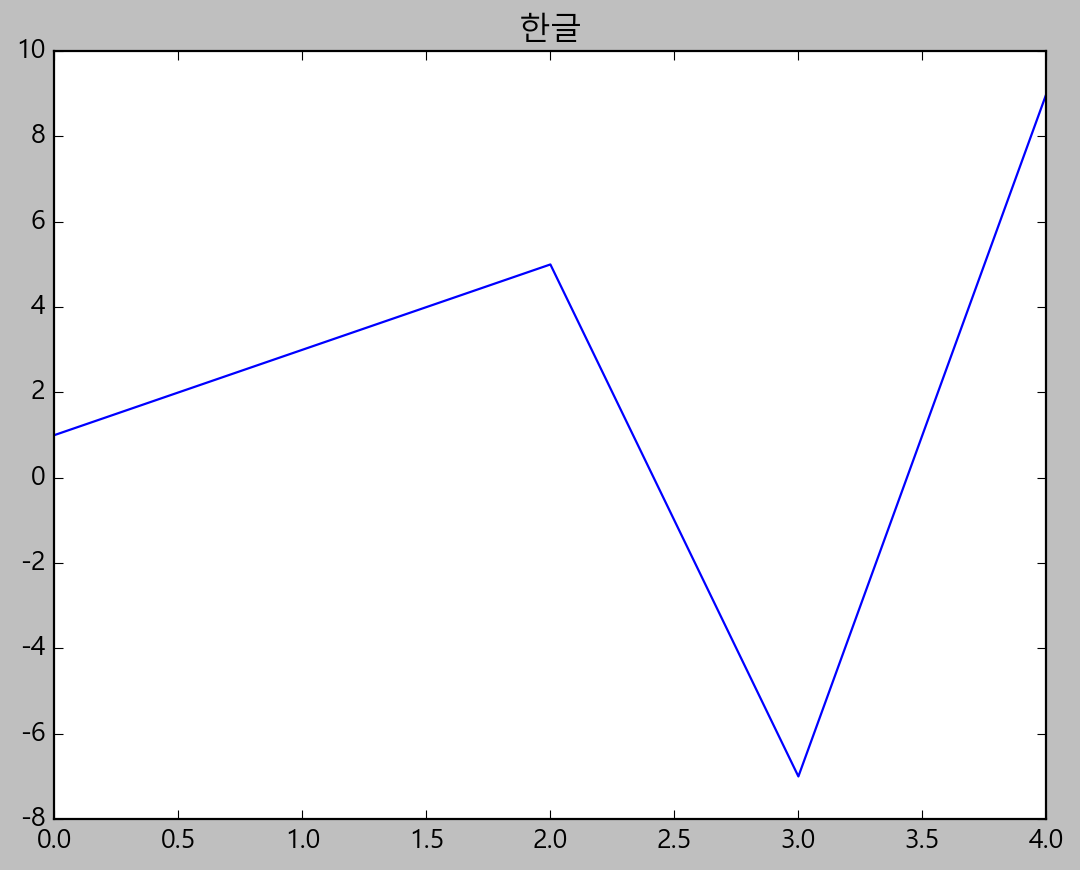

In [12]:
# 폰트 설정 확인하기
pd.Series([1,3,5,-7,9]).plot(title='한글') 

## 데이터 로드

In [24]:
# 이전 수업에서 수집해서 저장해둔 csv 파일을 읽어옵니다.
# 종목코드 0번 index의 69500앞에 0이 지워진다면, dtype = {"종목코드" : "object"}로 타입을 지정해 주면 문자형태로 읽어옵니다.
df = pd.read_csv('etf_2021_07_28.csv', dtype = {"종목코드" : "object"})
df

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,43005,2,130,0.30,43027.0,-0.7363,2409683,103245,41672,국내,KODEX,False,False,False
1,153130,6,KODEX 단기채권,102845,3,0,0.00,102846.0,0.0340,16993,1747,24206,파생,KODEX,False,False,False
2,252670,3,KODEX 200선물인버스2X,1930,5,-10,-0.52,1930.0,0.0000,208047261,403732,22070,국내,KODEX,True,False,False
3,102110,1,TIGER 200,43020,2,85,0.20,43060.0,-0.7054,917304,39354,21575,국내,TIGER,False,False,False
4,102780,2,KODEX 삼성그룹,10570,2,35,0.33,10594.0,3.2033,254361,2680,18180,시장지수,KODEX,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
484,267500,4,KBSTAR 미국장기국채선물인버스2X(합성 H),5790,5,-60,-1.03,NaN,-11.8976,6161,35,26,업종/테마,KBSTAR,True,False,True
485,287330,2,KBSTAR 200생활소비재,8880,2,30,0.34,8890.0,-1.7213,2235,19,21,시장지수,KBSTAR,False,False,False
486,334700,5,KBSTAR 팔라듐선물인버스(H),4545,2,75,1.68,NaN,5.1764,1855,8,18,국내,KBSTAR,True,False,True
487,287310,2,KBSTAR 200경기소비재,11835,5,-80,-0.67,11871.0,3.1691,323,3,17,시장지수,KBSTAR,False,False,False


In [25]:
df.tail()

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
484,267500,4,KBSTAR 미국장기국채선물인버스2X(합성 H),5790,5,-60,-1.03,NaN,-11.8976,6161,35,26,업종/테마,KBSTAR,True,False,True
485,287330,2,KBSTAR 200생활소비재,8880,2,30,0.34,8890.0,-1.7213,2235,19,21,시장지수,KBSTAR,False,False,False
486,334700,5,KBSTAR 팔라듐선물인버스(H),4545,2,75,1.68,NaN,5.1764,1855,8,18,국내,KBSTAR,True,False,True
487,287310,2,KBSTAR 200경기소비재,11835,5,-80,-0.67,11871.0,3.1691,323,3,17,시장지수,KBSTAR,False,False,False
488,287320,2,KBSTAR 200산업재,13370,2,30,0.22,13371.0,9.1653,3382,45,16,시장지수,KBSTAR,False,False,False


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 489 entries, 0 to 488
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   종목코드        489 non-null    object 
 1   탭코드         489 non-null    int64  
 2   종목명         489 non-null    object 
 3   현재가         489 non-null    int64  
 4   등락구분        489 non-null    int64  
 5   전일비         489 non-null    int64  
 6   등락률         489 non-null    float64
 7   순자산가치(NAV)  348 non-null    float64
 8   3개월수익률      467 non-null    float64
 9   거래량         489 non-null    int64  
 10  거래대금(백만)    489 non-null    int64  
 11  시가총액(억)     489 non-null    int64  
 12  유형          489 non-null    object 
 13  브랜드         489 non-null    object 
 14  인버스         489 non-null    bool   
 15  레버리지        489 non-null    bool   
 16  환헤지H        489 non-null    bool   
dtypes: bool(3), float64(3), int64(7), object(4)
memory usage: 55.0+ KB


## 결측치 확인

In [16]:
# 결측치 비율 구하기
(True + True + False) / 3

0.6666666666666666

In [19]:
# 결측치를 확인합니다.
df.isnull().sum()

# output 해석:  3개월수익률 22 >> 3개월내에 새로 생긴 ETF 22개

종목코드            0
탭코드             0
종목명             0
현재가             0
등락구분            0
전일비             0
등락률             0
순자산가치(NAV)    141
3개월수익률         22
거래량             0
거래대금(백만)        0
시가총액(억)         0
유형              0
브랜드             0
인버스             0
레버리지            0
환헤지H            0
dtype: int64

In [22]:
# 각 항목의 결측치의 비율을 봅니다.
df.isnull().mean()  *100   #백분위로 보고 싶을 때 *100

종목코드           0.000000
탭코드            0.000000
종목명            0.000000
현재가            0.000000
등락구분           0.000000
전일비            0.000000
등락률            0.000000
순자산가치(NAV)    28.834356
3개월수익률         4.498978
거래량            0.000000
거래대금(백만)       0.000000
시가총액(억)        0.000000
유형             0.000000
브랜드            0.000000
인버스            0.000000
레버리지           0.000000
환헤지H           0.000000
dtype: float64

<AxesSubplot:>

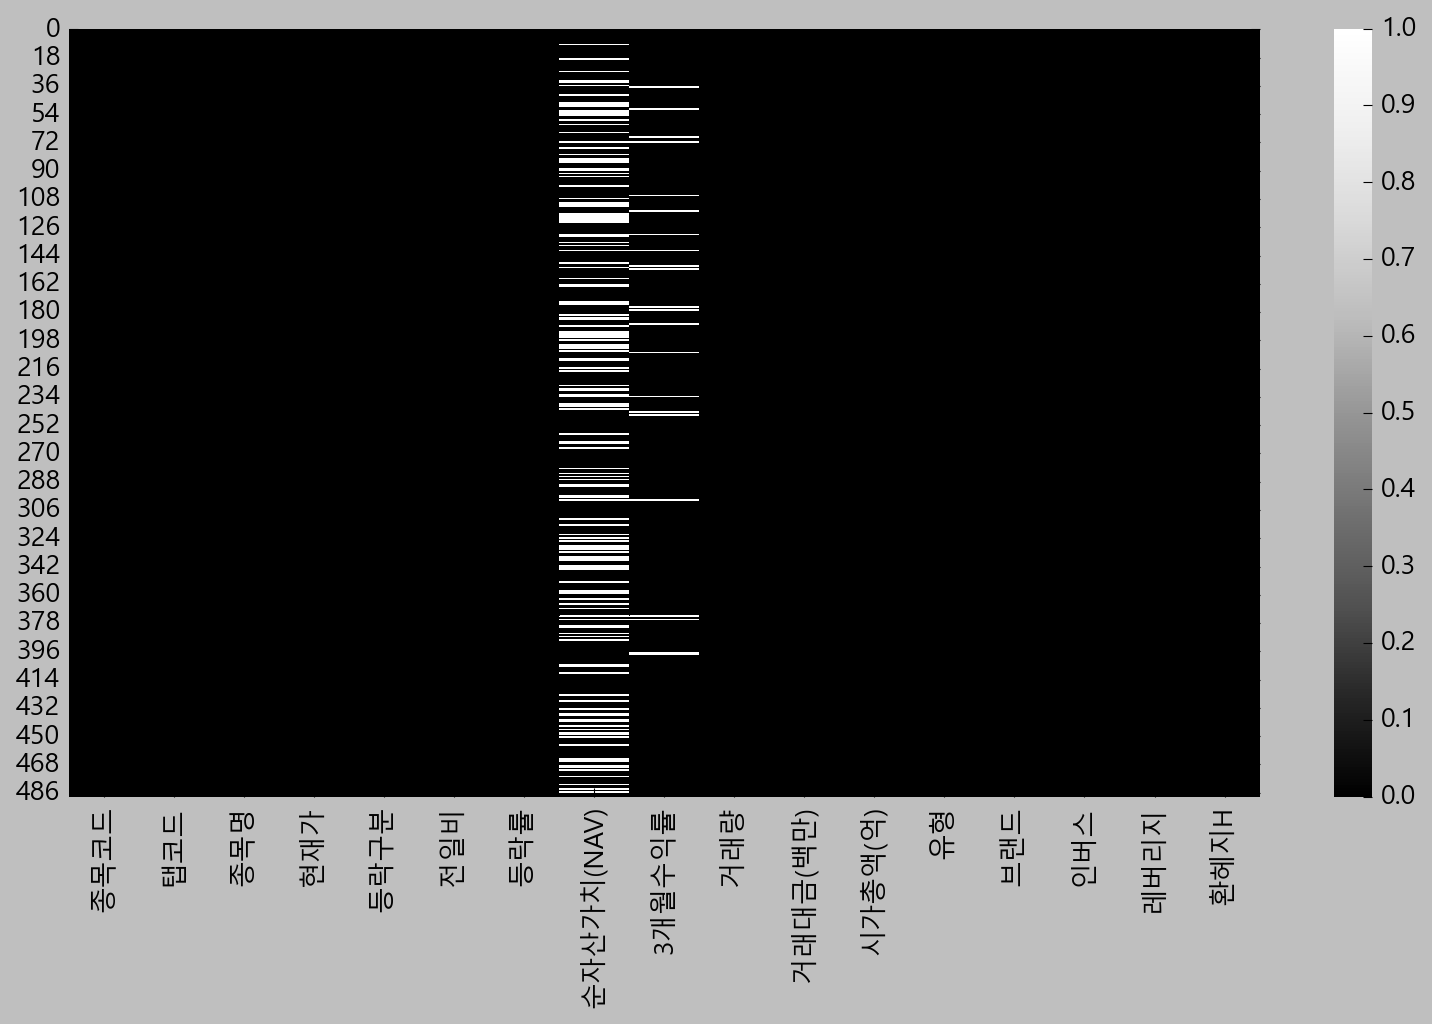

In [25]:
# heatmap을 통한 결측치 시각화
plt.figure(figsize = (12,6))
sns.heatmap(df.isnull(), cmap ='Greys_r')

## 범주형 데이터의 빈도수
### 범주형 변수 찾기

In [26]:
# describe를 통해 범주형 변수에 대한 기술통계 값을 구하기
# describe의 기본값은 수치형 이기 때문에, 'object'
df.describe(include = 'object')

,종목코드,종목명,유형,브랜드
count,489,489,489,489
unique,489,489,5,18
top,215620,KINDEX 중국본토CSI300레버리지(합성),시장지수,TIGER
freq,1,1,180,128


In [35]:
# unique(중복을 제외한 값)에 대한 빈도수 구하기
# object type 이 아니더라도 nunique 값이 작다면 범주형 변수인지 확인해 봅니다.

df.nunique()

종목코드          489
탭코드             7
종목명           489
현재가           463
등락구분            3
전일비           101
등락률           209
순자산가치(NAV)    345
3개월수익률        463
거래량           451
거래대금(백만)      284
시가총액(억)       355
유형              5
브랜드            18
인버스             2
레버리지            2
환헤지H            2
dtype: int64

<Figure size 960x480 with 0 Axes>

### ETF 상품 유형별 빈도수(한 개의 변수)

<AxesSubplot:>

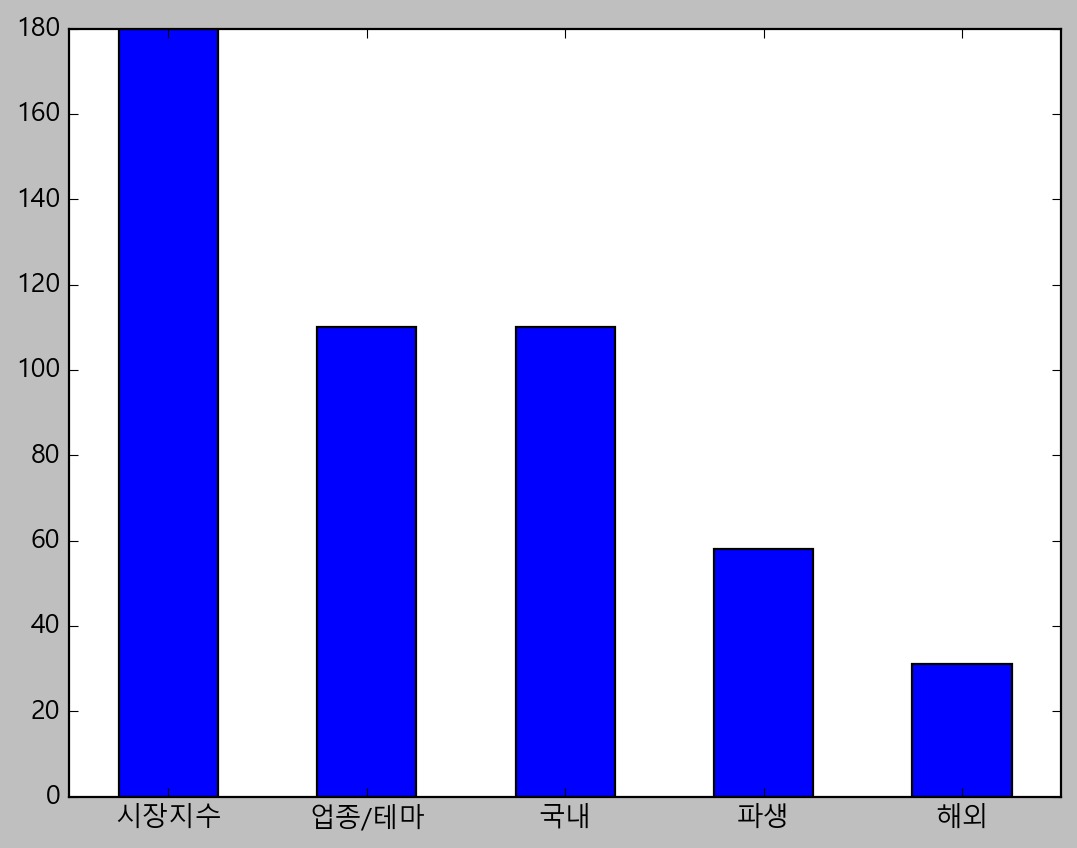

In [37]:
# df["유형"].value_counts() 의 결과와 같게 시각화 할 수 있습니다.
df["유형"].value_counts().plot.bar(rot=0) # rot=0: KOSPI, KOSDAQ, KONEX 글씨가 눕히지 앟고 똑바로 하기 위함


<AxesSubplot:xlabel='유형', ylabel='count'>

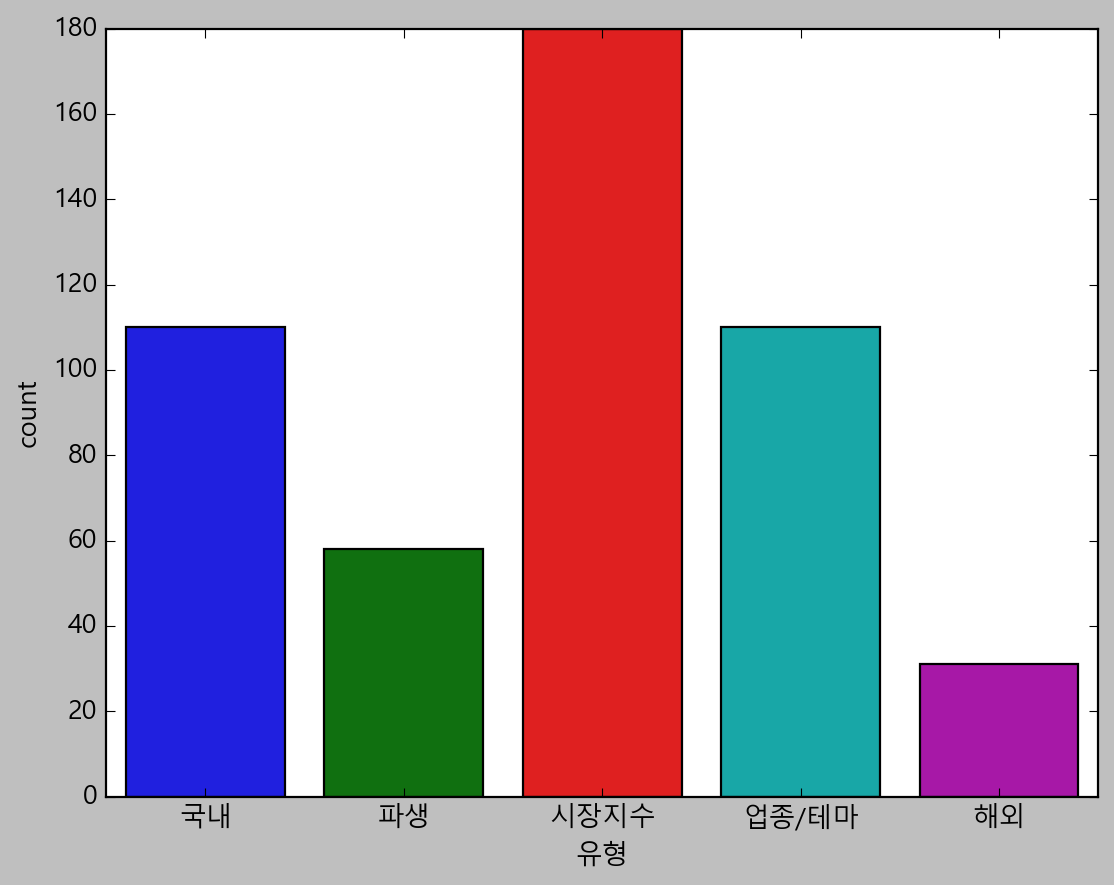

In [41]:
# sns.countplot 으로 빈도수를 시각화 합니다.
sns.countplot(data=df, x='유형') 

In [27]:
# value_counts 로 빈도수를 직접 계산합니다.
df["유형"].value_counts()

시장지수     180
업종/테마    110
국내       110
파생        58
해외        31
Name: 유형, dtype: int64

In [28]:
# value_counts(normalize=True) 로 빈도수의 비율을 구합니다.
df["유형"].value_counts(normalize=True)*100

시장지수     36.809816
업종/테마    22.494888
국내       22.494888
파생       11.860941
해외        6.339468
Name: 유형, dtype: float64

### 두 개의 변수 빈도수와 비율

<AxesSubplot:xlabel='유형', ylabel='count'>

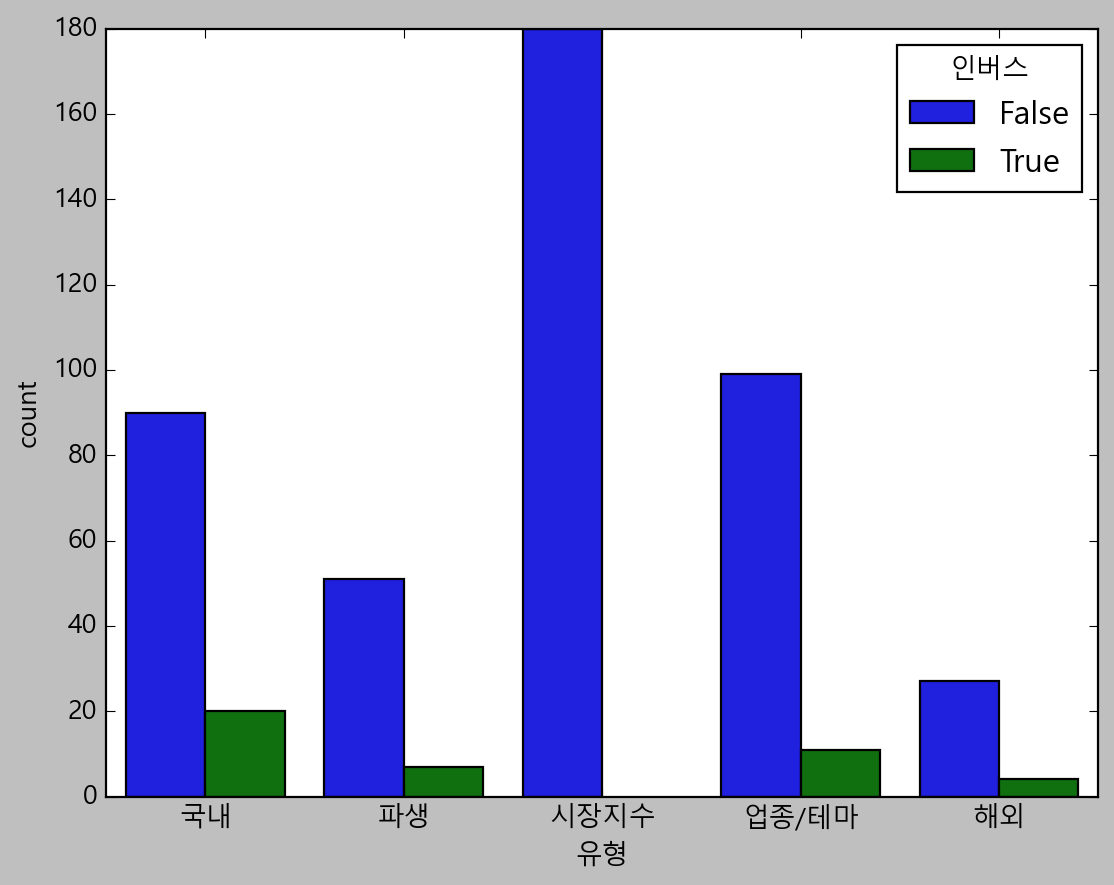

In [32]:
sns.countplot(data=df, x='유형', hue='인버스')

In [34]:
# pd.crosstab을 이용하여 위 그래프의 수치를 확인할 수 있다.
pd.crosstab(df['인버스'], df['유형'])

유형,국내,시장지수,업종/테마,파생,해외
인버스,,,,,
False,90,180,99,51,27
True,20,0,11,7,4


<AxesSubplot:xlabel='유형', ylabel='count'>

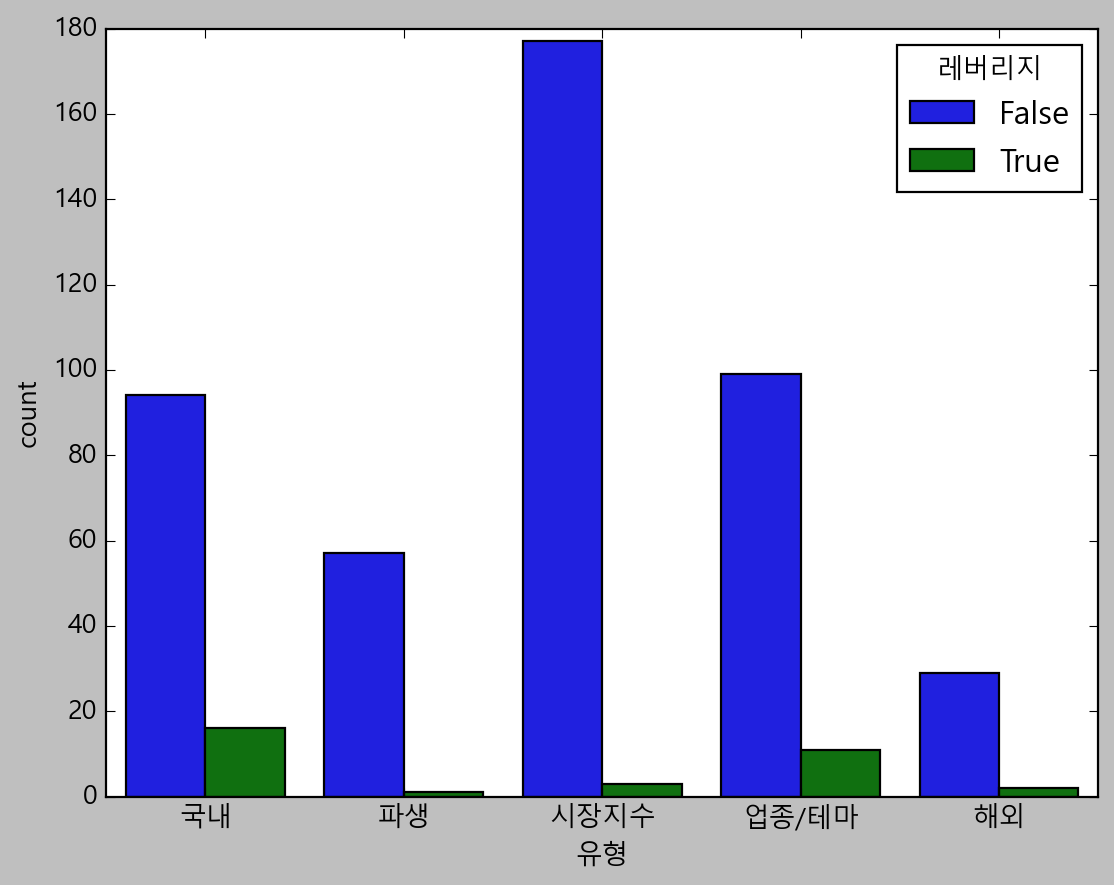

In [37]:
# 유형 데이터를 레버리지 여부에 따라 그립니다. 
sns.countplot(data=df, x='유형', hue ='레버리지') 

In [39]:
pd.crosstab(df['레버리지'], df['유형'])

유형,국내,시장지수,업종/테마,파생,해외
레버리지,,,,,
False,94,177,99,57,29
True,16,3,11,1,2


### 브랜드별 빈도수

In [40]:
df['브랜드'].value_counts()

TIGER        128
KODEX        123
KBSTAR        82
KINDEX        47
ARIRANG       40
KOSEF         26
HANARO        19
SMART          5
파워             4
FOCUS          2
TREX           2
TIMEFOLIO      2
HK             2
마이티            2
네비게이터          2
KTOP           1
마이다스           1
흥국             1
Name: 브랜드, dtype: int64

<AxesSubplot:xlabel='브랜드', ylabel='count'>

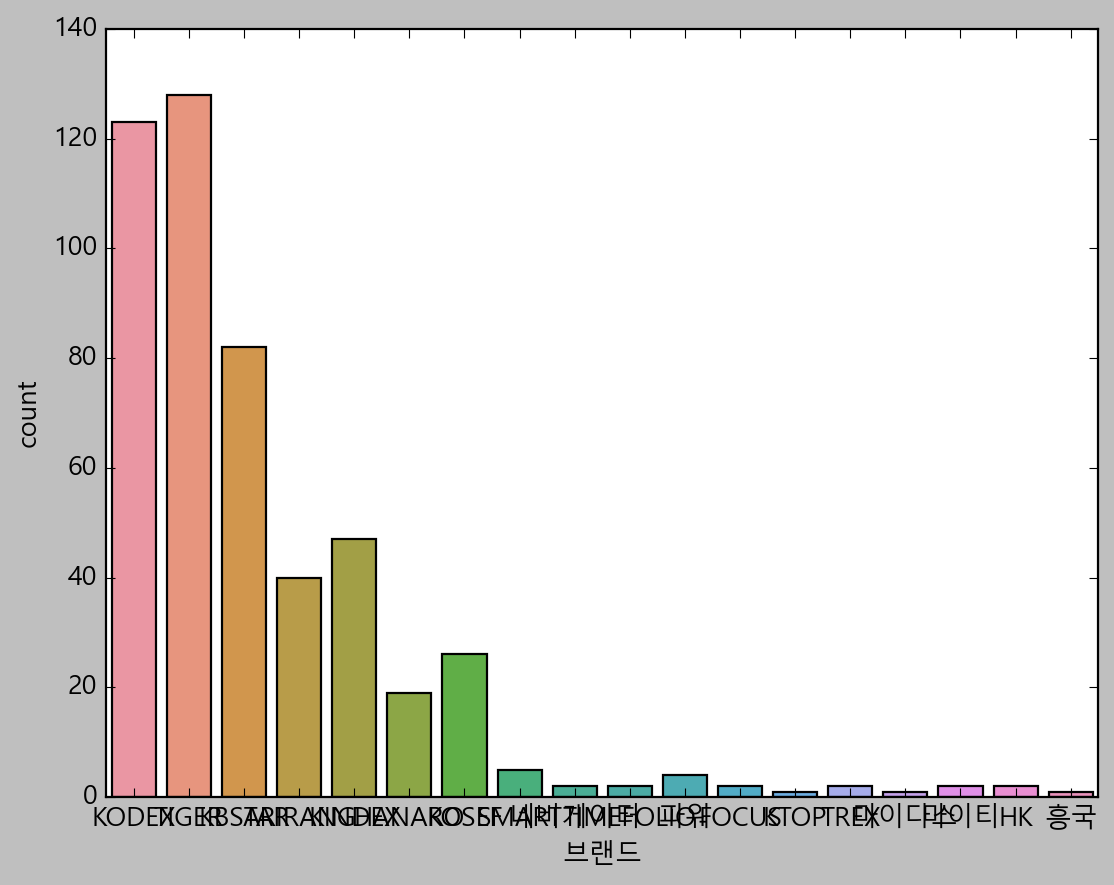

In [41]:
sns.countplot(data = df , x ='브랜드')

<AxesSubplot:xlabel='브랜드', ylabel='count'>

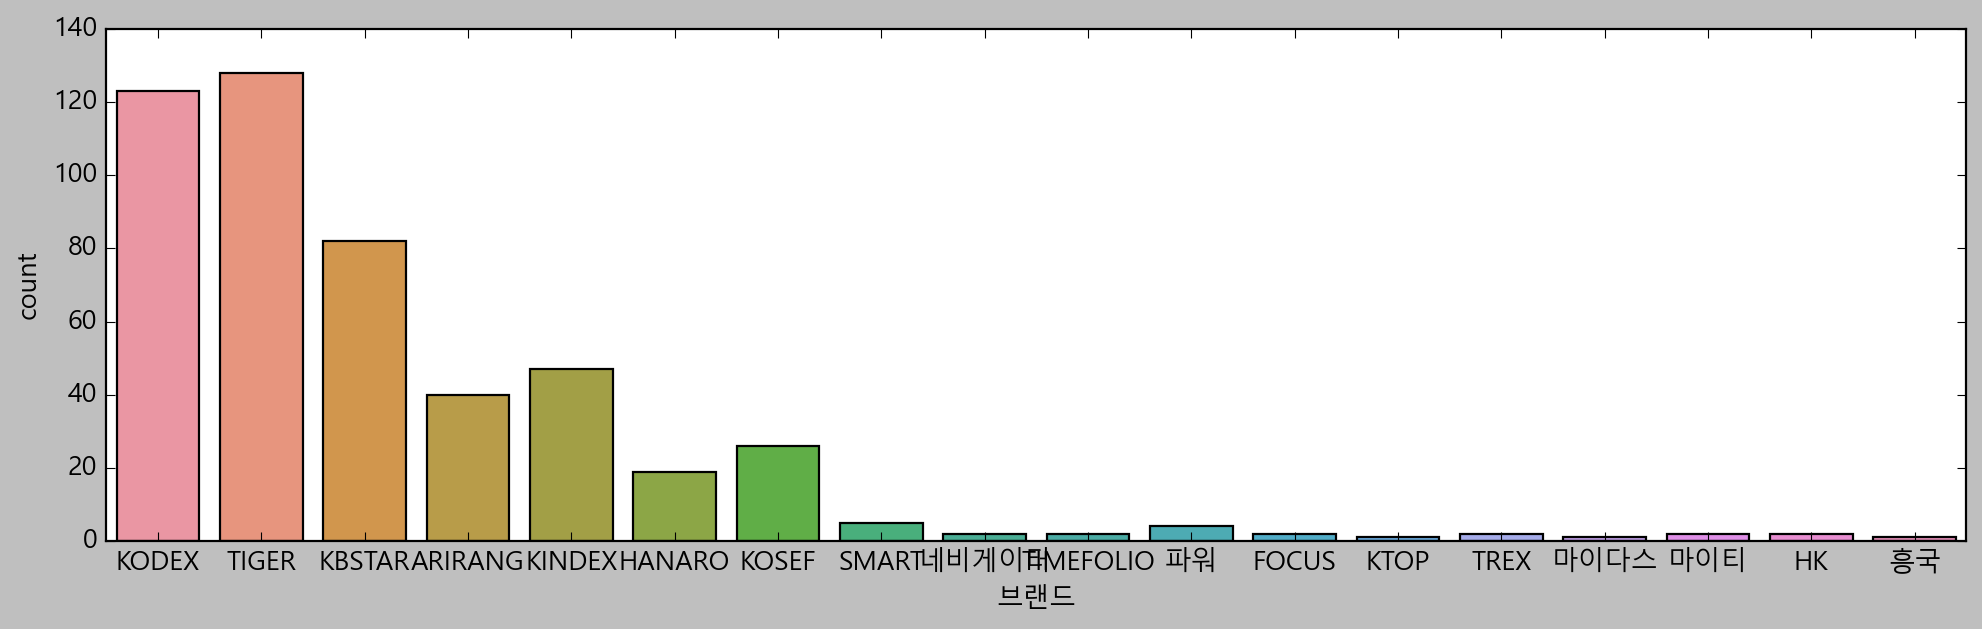

In [42]:
# x축 이 겹치는 문제를 해결하기 위한 figuresize 조정
plt.figure(figsize = (15,4))
sns.countplot(data = df , x ='브랜드')

### 인버스, 브랜드의 ETF 빈도 비율


* 인버스 ETF란? 주식관련 장내 외 파생상품 투자 및 증권차입매도 등을 통해 기초지수(KOSPI 200지수)의 일일 변동률(일별수익률)을 음의 1배수 즉, 역방향으로 추적하는 ETF를 말한다. 예를 들어, KOSPI 200지수가 1% 상승할 경우 인버스 ETF는 마이너스 1% 수익률, 반대로 KOSPI 200 지수가 1% 하락시 인버스 ETF는 플러스 1%의 수익률을 목표로 운영된다.
[네이버 지식백과] 인버스ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=20336&cid=43659&categoryId=43659

<AxesSubplot:xlabel='브랜드', ylabel='count'>

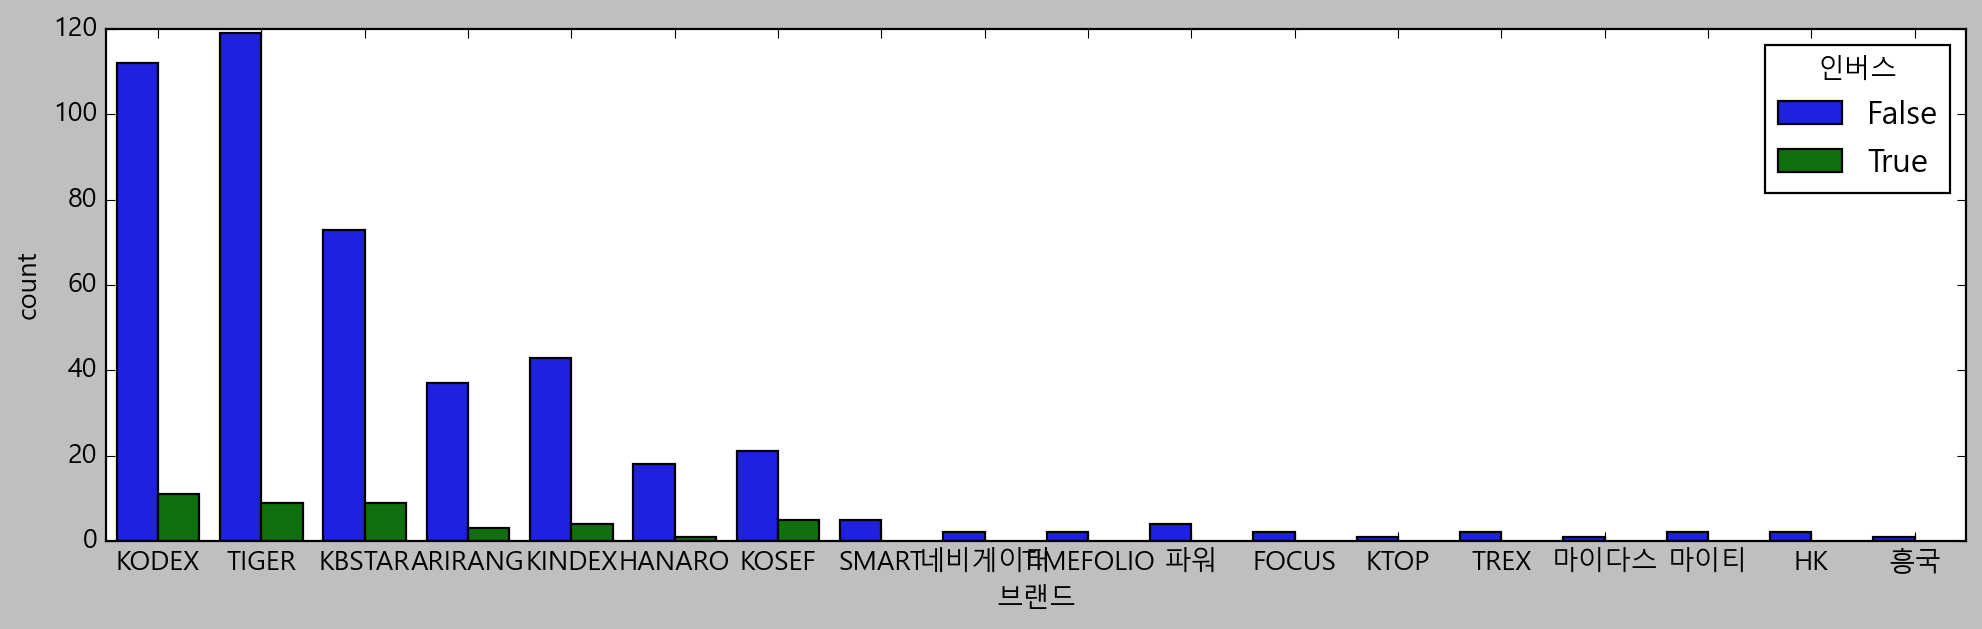

In [57]:
# 브랜드 column의 빈도수를 인버스에 따른 구분으로 그려봅니다.
plt.figure(figsize = (15,4))
sns.countplot(data = df , x ='브랜드', hue = '인버스')


In [45]:
# 인버스, 브랜드의 금융상품 빈도수
# pd.crosstab을 이용하여 위 그래프의 수치를 확인할 수 있다.
pd.crosstab(df['인버스'], df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TIMEFOLIO,TREX,네비게이터,마이다스,마이티,파워,흥국
인버스,,,,,,,,,,,,,,,,,,
False,37,2,18,2,73,43,112,21,1,5,119,2,2,2,1,2,4,1
True,3,0,1,0,9,4,11,5,0,0,9,0,0,0,0,0,0,0


In [59]:
# 삭제
# 인버스, 브랜드의 금융상품 빈도 비율
# in_brand_norm
pd.crosstab(df['인버스'],df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TIMEFOLIO,TREX,네비게이터,마이다스,마이티,파워,흥국
인버스,,,,,,,,,,,,,,,,,,
False,37,2,18,2,73,43,112,21,1,5,119,2,2,2,1,2,4,1
True,3,0,1,0,9,4,11,5,0,0,9,0,0,0,0,0,0,0


### 레버리지, 브랜드의 ETF 빈도 비율
* 레버리지 ETF란? 일반 ETF가 코스피200과 같은 지수 내 대표 주식을 보유함으로써 지수와 비슷한 수익률을 내는 것을 목표로 하는 데 비해 레버리지ETF는 선물 등 파생상품에 투자해 지수보다 높은 수익을 추구하는 ETF다. 상승장에서는 높은 수익률을 기대할 수 있지만 하락장에서는 손실도 커져 고위험ㆍ고수익 상품으로 분류된다.
[네이버 지식백과] 레버리지 ETF (매일경제, 매경닷컴)
* 출처 : https://terms.naver.com/entry.nhn?docId=2059802&cid=43659&categoryId=43659

<AxesSubplot:xlabel='브랜드', ylabel='count'>

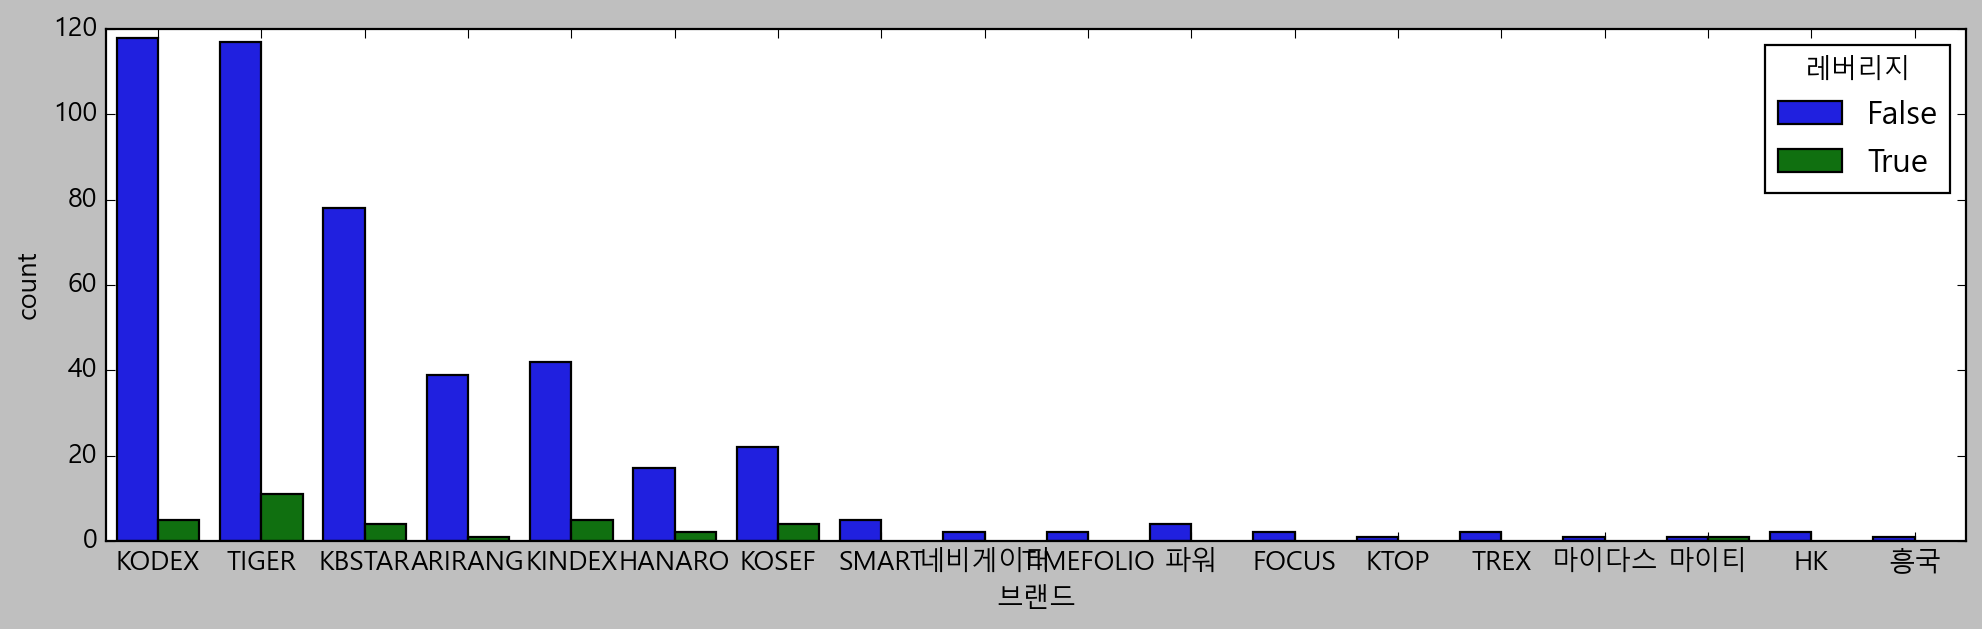

In [60]:
# 브랜드별 레버리지 여부에 따른 빈도수를 시각화 합니다.

plt.figure(figsize = (15,4))
sns.countplot(data = df , x ='브랜드', hue = '레버리지')

In [61]:
# 레버리지, 브랜드의 ETF 빈도수(crosstab)
pd.crosstab(df['레버리지'],df['브랜드'])

브랜드,ARIRANG,FOCUS,HANARO,HK,KBSTAR,KINDEX,KODEX,KOSEF,KTOP,SMART,TIGER,TIMEFOLIO,TREX,네비게이터,마이다스,마이티,파워,흥국
레버리지,,,,,,,,,,,,,,,,,,
False,39,2,17,2,78,42,118,22,1,5,117,2,2,2,1,1,4,1
True,1,0,2,0,4,5,5,4,0,0,11,0,0,0,0,1,0,0


In [62]:
# 레버리지, 브랜드의 ETF 비율
pd.crosstab(df['레버리지'],df['브랜드'], nomalize = True)

TypeError: crosstab() got an unexpected keyword argument 'nomalize'

## 수치형 변수의 기술통계

In [63]:
# describe로 수치형 변수의 기술통계 구하기
# desc

df.describe()

,탭코드,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억)
count,489.000000,489.000000,489.000000,489.000000,489.000000,348.000000,467.000000,4.890000e+02,489.000000,489.000000
mean,3.257669,23794.447853,3.758691,-34.907975,-0.206462,27028.045977,1.301583,7.475574e+05,5183.237219,1219.503067
std,1.805918,25884.176998,1.438298,122.681121,0.732923,28559.836804,6.410780,9.704730e+06,30616.111410,3403.589879
min,1.000000,1920.000000,2.000000,-1005.000000,-3.410000,1917.000000,-31.163500,0.000000e+00,0.000000,16.000000
25%,2.000000,10570.000000,2.000000,-85.000000,-0.540000,11098.000000,-1.215500,4.370000e+02,8.000000,84.000000
50%,2.000000,13900.000000,5.000000,-15.000000,-0.080000,14769.500000,0.563500,5.358000e+03,76.000000,200.000000
75%,4.000000,21310.000000,5.000000,30.000000,0.200000,28663.000000,3.759850,4.459700e+04,608.000000,683.000000
max,7.000000,133775.000000,5.000000,300.000000,1.680000,134007.000000,48.079500,2.080473e+08,403732.000000,41672.000000


## 수치형 변수로 히스토그램 그리기

* 연속된 수치 데이터를 범주형 데이터로 표현, bucketing 이라고 부르기도 함
* 히스토그램 : 도수분포를 그래프 형태로 표현한 것
* 막대그래프와 비슷해 보이지만 다른 그래프
* 참고 : [히스토그램 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%ED%9E%88%EC%8A%A4%ED%86%A0%EA%B7%B8%EB%9E%A8)

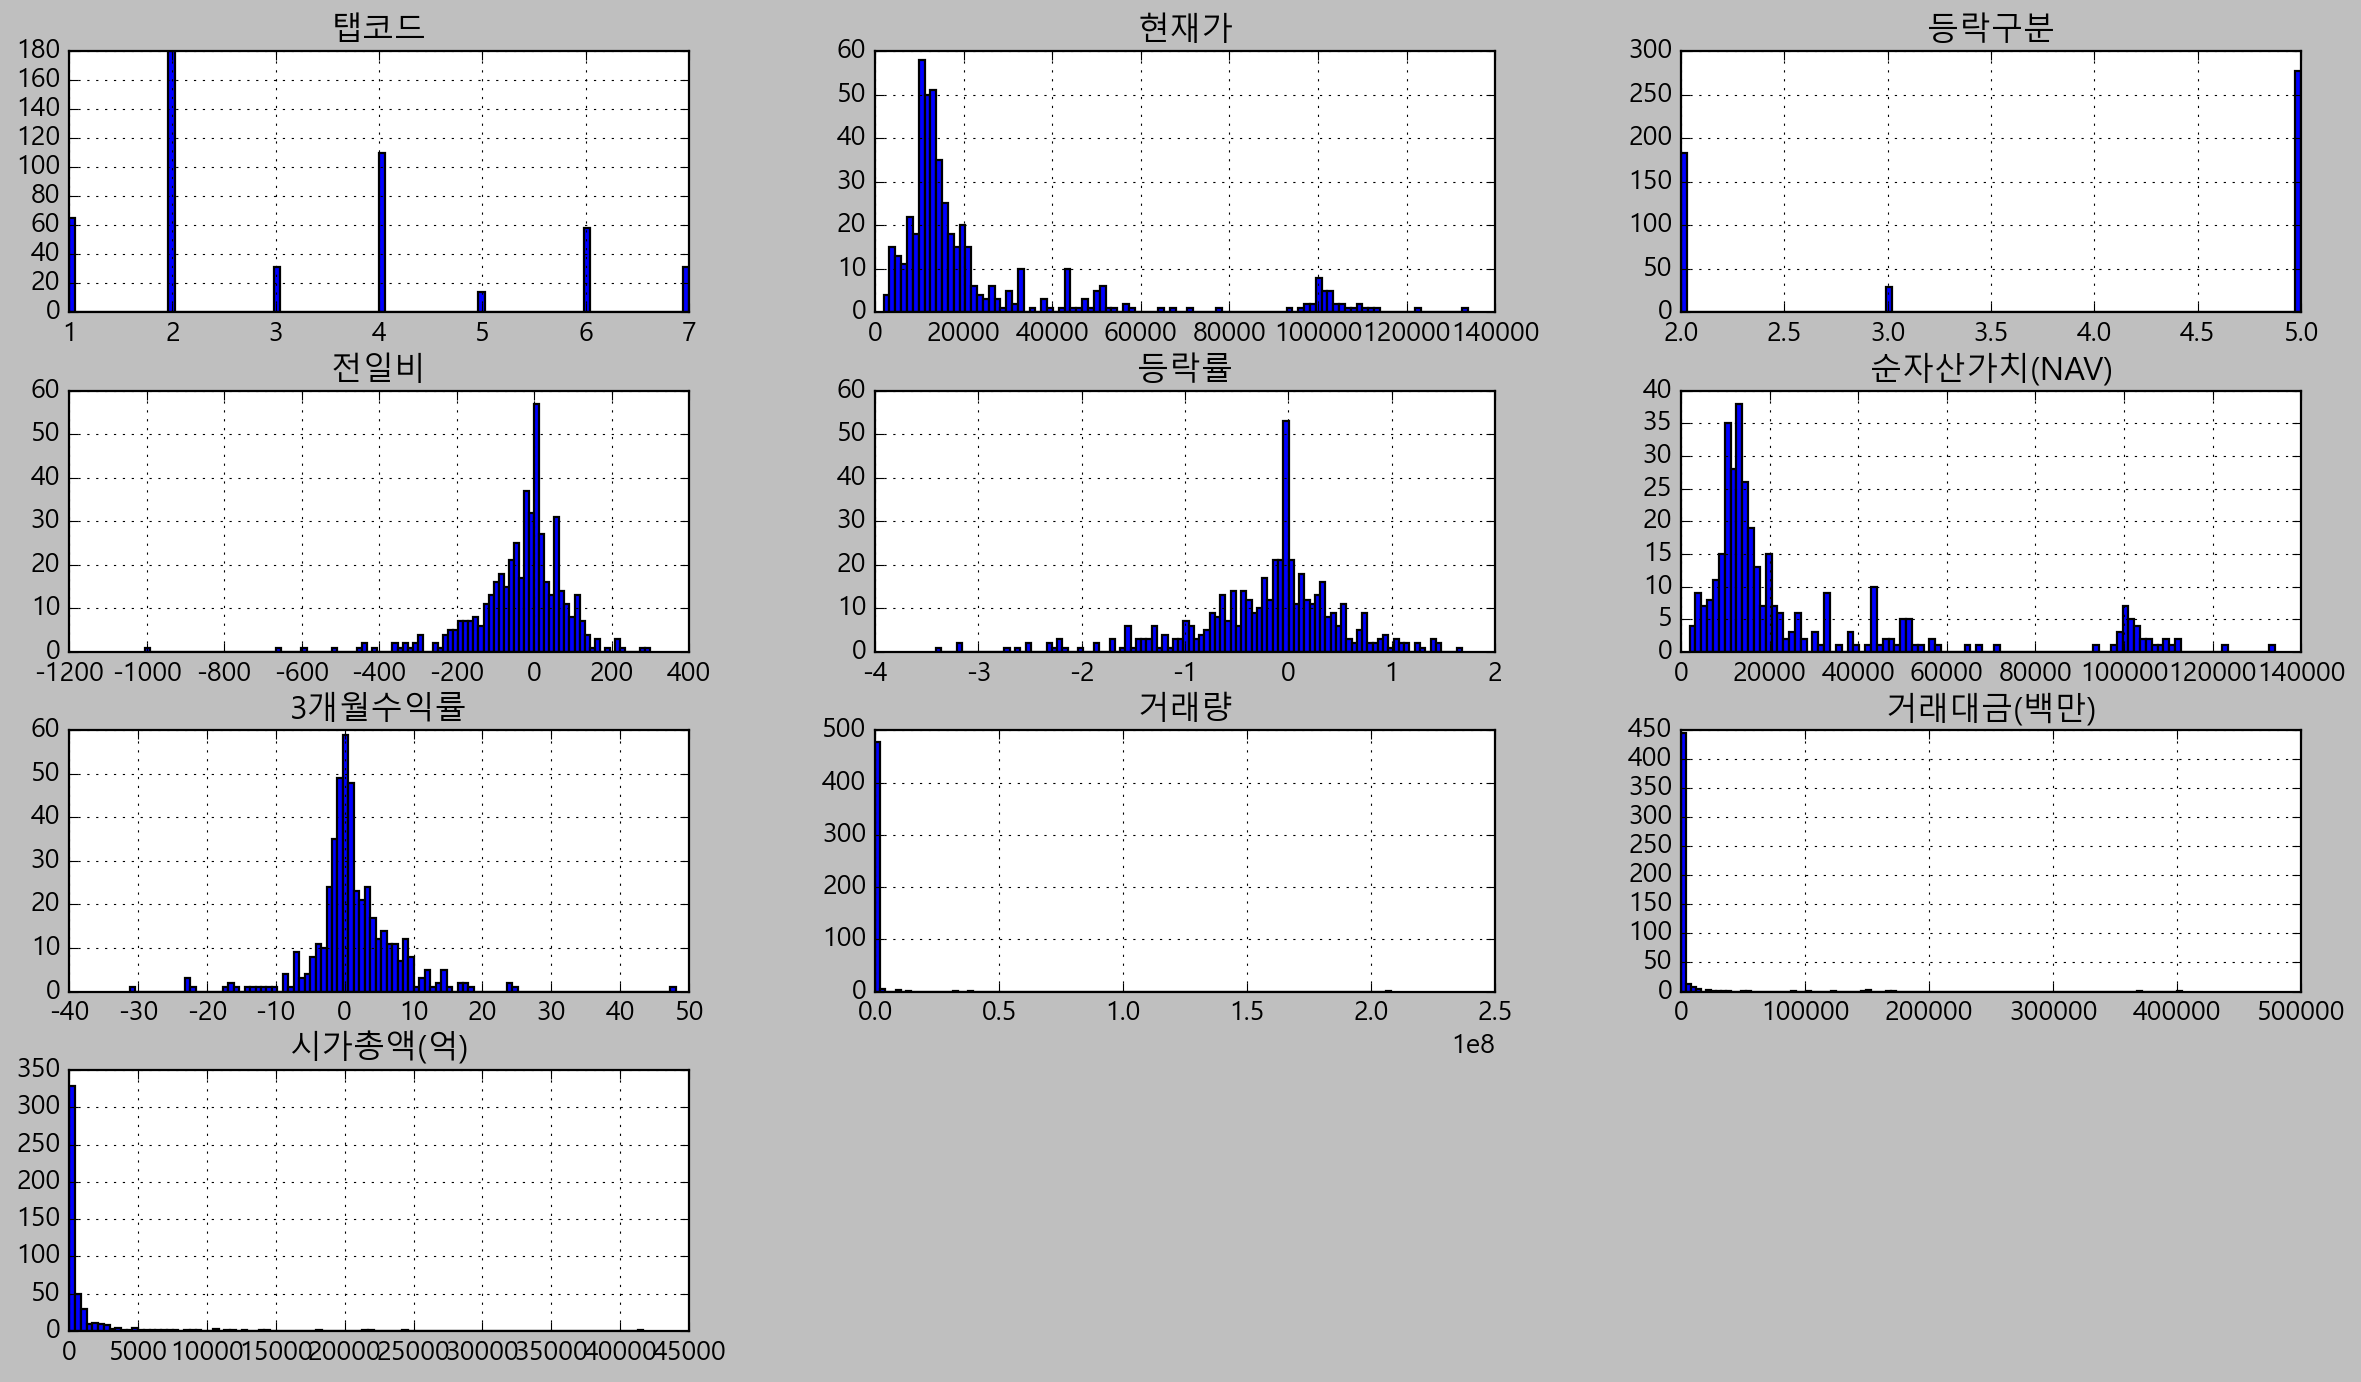

In [48]:
# 수치형 컬럼만 리스트로 만들기
# num_cols
# df.hist()
# 히스토그램을 그려보면 수치 데이터로 되어있지만 범주형 데이터를 찾아볼 수 있습니다.
_= df.select_dtypes(include = np.number).hist(figsize =(18,10), bins =100)

# Outcome 해석: 탭코드를 보면 끊어져 있기 때문에, 범주형 데이터로 볼 수 있다.
# 

## 범주형 vs 수치형 변수
### seaborn의 barplot 이해하기

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

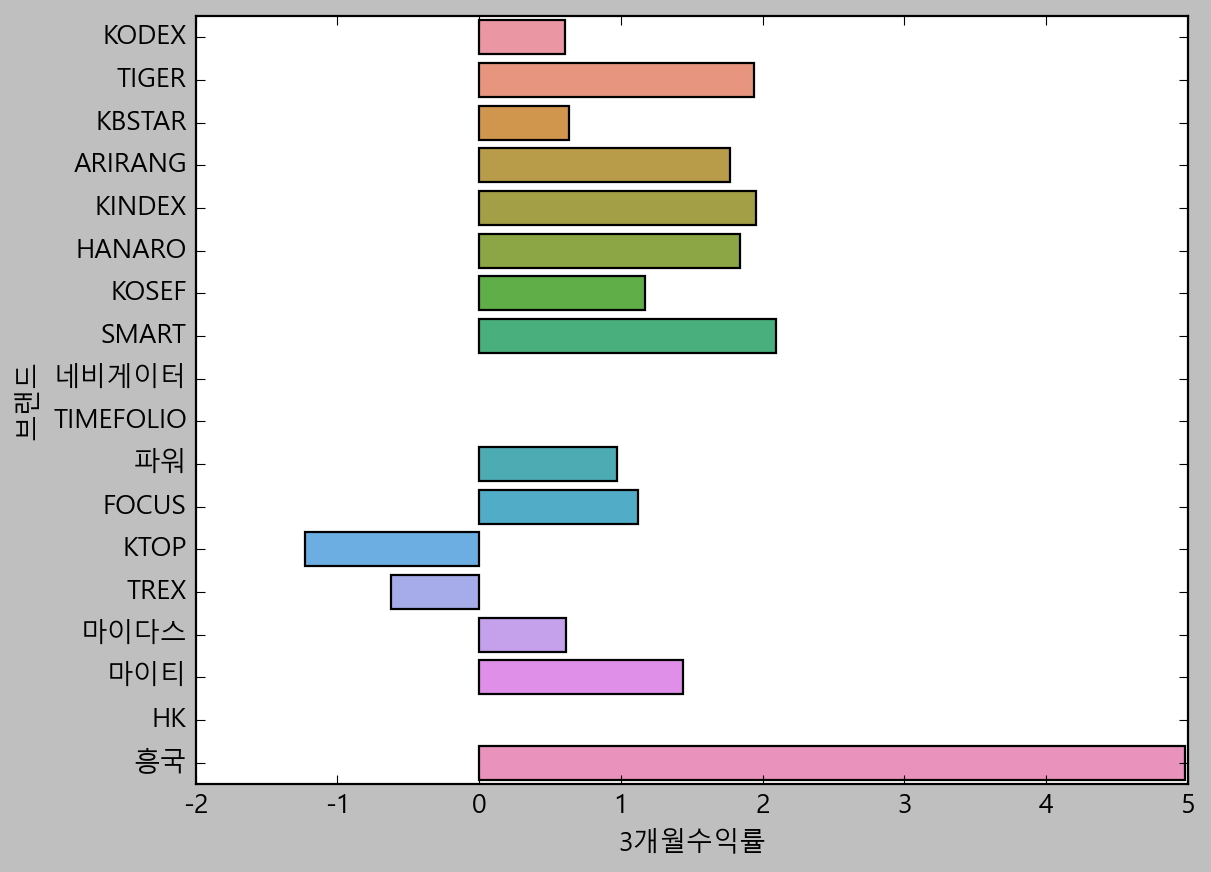

In [49]:
# seaborn의 bar chart를 이용하여 각 브랜드에 대한 3개월수익률의 평균값을 볼 수 있습니다.
# 검은색 막대는 ci로 신뢰구간을 의미합니다.
sns.barplot(data = df, x='3개월수익률', y='브랜드', ci =None)  # 큰데이터를 다룰 때는 ci는 빼고(None) 하는 걸 추천 


# 신뢰도: 후보 예상, 샘플링한 데이터를 얼마나 믿을 수 있는지 

### barplot 그래프의 값을 groupby 로 직접 구하기

In [50]:
# 위 그래프의 평균 값을 직접 계산을 통해 구해 봅니다.
# brand_3month_mean
brand_3month_mean = df.groupby("브랜드")['3개월수익률'].mean().sort_values(ascending = False)
brand_3month_mean.head()

브랜드
흥국        4.977600
SMART     2.092920
KINDEX    1.951685
TIGER     1.938860
HANARO    1.841317
Name: 3개월수익률, dtype: float64

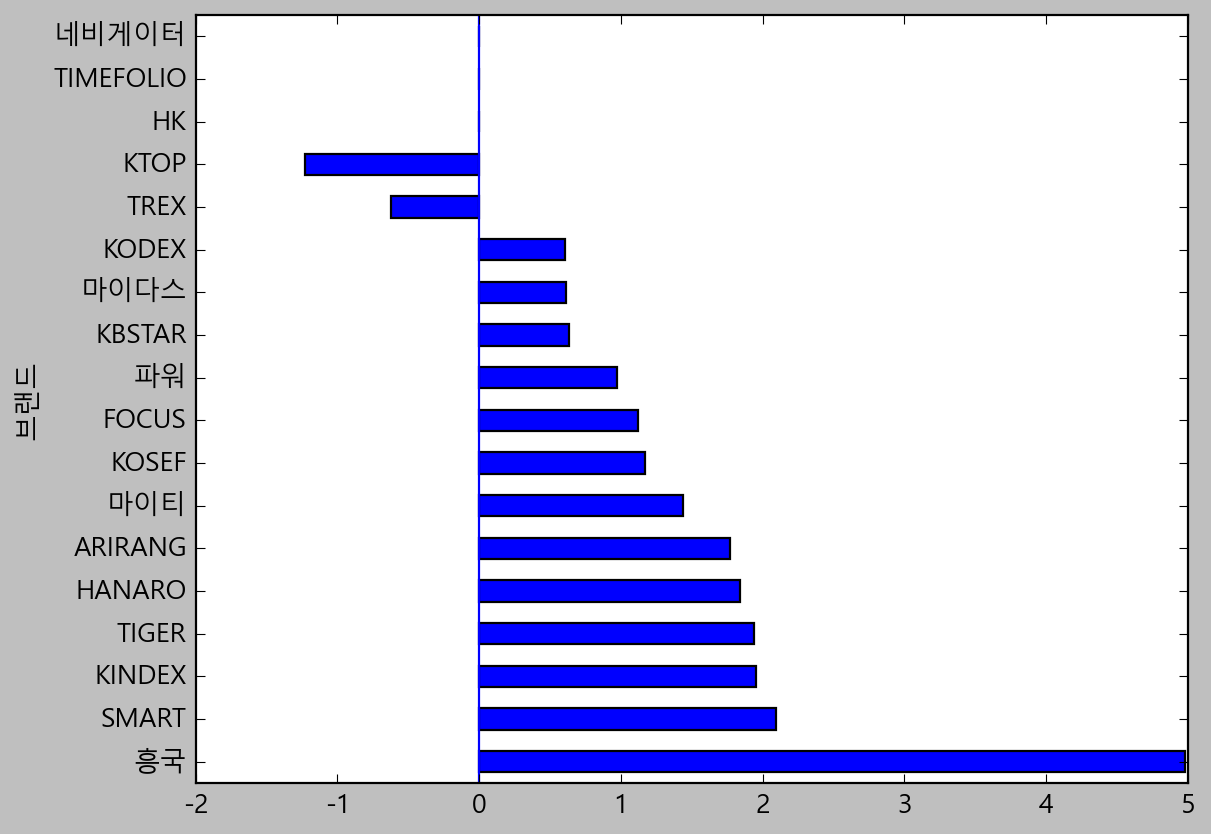

In [51]:
# 위에서 구한 그룹(브랜드)별 평균 3개월 수익률을 그래프로 표현합니다.
brand_3month_mean.plot.barh()
plt.axvline(0)

In [52]:
# 브랜드가 마이티인 경우의 데이터를 확인합니다.
df[df['브랜드'] == '마이티']

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
354,159800,1,마이티 코스피100,32565,5,-10,-0.03,32608.0,-0.8100,2,0,91,국내,마이티,False,False,False
416,292340,2,마이티 200커버드콜ATM레버리지,11060,5,-70,-0.63,11147.0,3.6795,207,2,66,시장지수,마이티,False,True,False


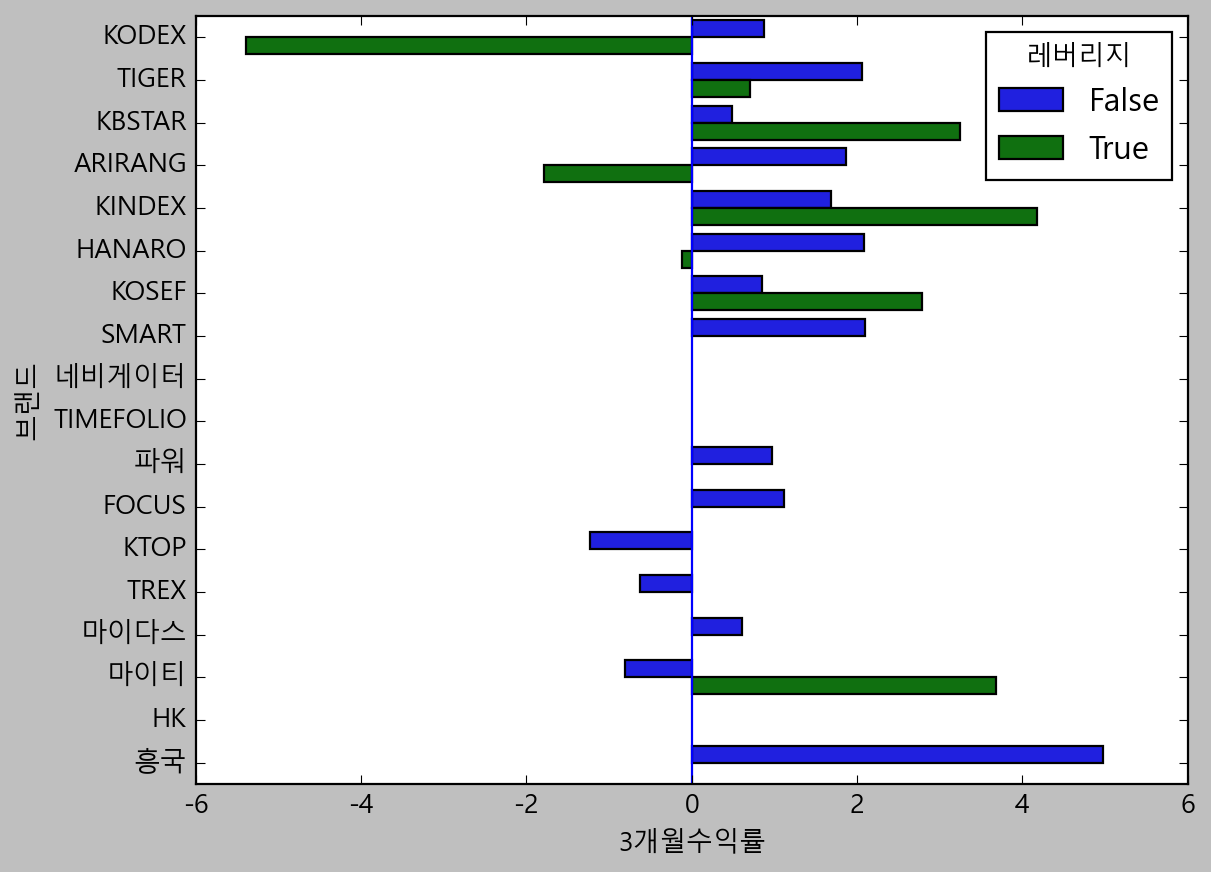

In [53]:
# 브랜드 대비 3개월수익률에 대한 정보를 레버리지 값의 차이를 barplot으로 봅니다.
# 레버리지 유/무에 따라서 평균 3개월 수익률은 많은 차이가 없지만,
# 표준편차의 경우 레버리지가 있을경우 굉장히 편차(ci="sd")가 심함을 알 수 있습니다.
# 레버리지 상품은 오를 때 더 많이 오르고 내릴 때 더 많이 내립니다.


sns.barplot(data = df , x ='3개월수익률', y='브랜드',  hue = '레버리지', ci=None)
plt.axvline(0) # x축 0에 선을 넣어서 그리고 싶으면.

* [Styling — pandas documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/style.html)

In [55]:
# 위에서 그린 그래프의 값을 groupby로 구합니다.
df.groupby(["브랜드",'레버리지'])['3개월수익률'].mean().unstack()

레버리지,False,True
브랜드,,
ARIRANG,1.864600,-1.784000
FOCUS,1.118400,NaN
HANARO,2.086712,-0.121850
HK,NaN,NaN
KBSTAR,0.490522,3.239450
KINDEX,1.686929,4.175640
KODEX,0.870048,-5.389680
KOSEF,0.844740,2.788475
KTOP,-1.231000,NaN


### boxplot으로 그리기

#### 기술통계 용어

* 백분위 수 : 데이터를 백등분 한 것
* 사분위 수 : 데이터를 4등분 한 것
* 중위수 : 데이터의 정 가운데 순위에 해당하는 값.(관측치의 절반은 크거나 같고 나머지 절반은 작거나 같다.)
* 제 3사분위 수 (Q3) : 중앙값 기준으로 상위 50% 중의 중앙값, 전체 데이터 중 상위 25%에 해당하는 값
* 제 1사분위 수 (Q1) : 중앙값 기준으로 하위 50% 중의 중앙값, 전체 데이터 중 하위 25%에 해당하는 값
* 사분위 범위 수(IQR) : 데이터의 중간 50% (Q3 - Q1)

* 출처 : [상자 수염 그림 - 위키백과, 우리 모두의 백과사전](https://ko.wikipedia.org/wiki/%EC%83%81%EC%9E%90_%EC%88%98%EC%97%BC_%EA%B7%B8%EB%A6%BC)

###  boxplot의 장점
#### barplot에서는 흥국이 수익률이 높아 보였으나, boxplot으로 보면 낮은 걸 알 수 있다.

<AxesSubplot:xlabel='3개월수익률', ylabel='브랜드'>

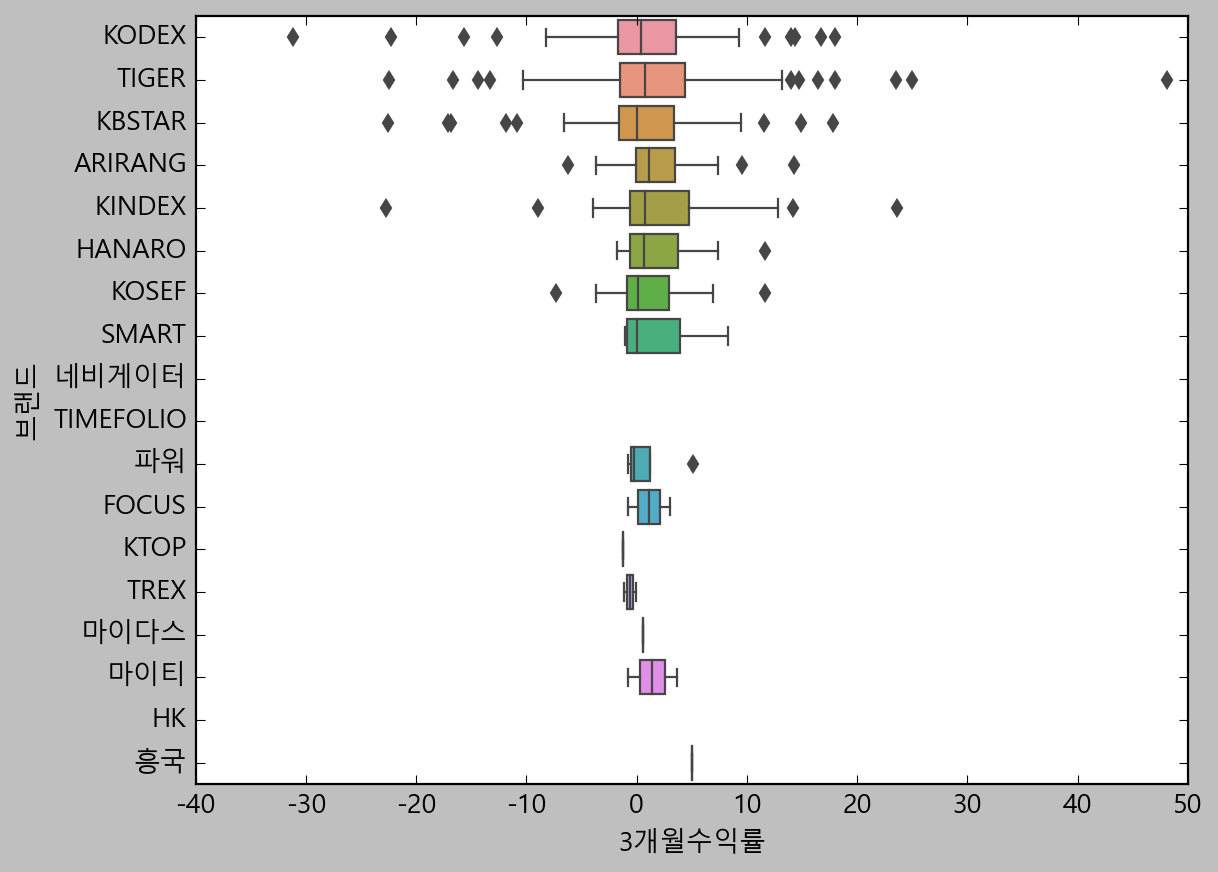

In [57]:
# 브랜드별 3개월 수익률을 레버리지에 따라 다른 색상으로 시각화 합니다.
sns.boxplot(data = df , x ='3개월수익률', y='브랜드')

#흥국: ETF 가 적기 때문에 납작하게 보인다

#### boxplot 보는 방법

* 사분위수 범위(IQR, Interquartile range, Q3-Q1)
* 이상치를 제외한 최댓값  = Q3 + 1.5IQR
* 이상치를 제외한 최솟값  = Q1 - 1.5IQR

### 브랜드 별로 3개월 수익률에 대한 기술통계(discribe) 값 구하기

In [58]:
# 위에서 그린 boxplot의 값을 직접 구해봅니다.
brand_3month_describe = df.groupby("브랜드")['3개월수익률'].describe()
brand_3month_describe

,count,mean,std,min,25%,50%,75%,max
브랜드,,,,,,,,
ARIRANG,40.0,1.773385,3.601803,-6.2043,-0.076475,1.09065,3.463800,14.2914
FOCUS,2.0,1.118400,2.748807,-0.8253,0.146550,1.11840,2.090250,3.0621
HANARO,18.0,1.841317,3.591961,-1.8159,-0.643100,0.71215,3.760825,11.6541
HK,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
KBSTAR,77.0,0.633323,6.286317,-22.5944,-1.633900,0.06700,3.390900,17.7884
KINDEX,47.0,1.951685,6.667292,-22.7317,-0.645550,0.74660,4.778600,23.6628
KODEX,119.0,0.607034,6.363148,-31.1635,-1.668700,0.41250,3.597550,17.9662
KOSEF,24.0,1.168696,3.981056,-7.3596,-0.883825,0.13965,2.895800,11.6161
KTOP,1.0,-1.231000,NaN,-1.2310,-1.231000,-1.23100,-1.231000,-1.2310


## KODEX ETF  따로 분석하기

In [59]:
#KODEX 서브셋을 만듭니다
df_kodex = df[df['브랜드']== 'KODEX'].copy()  # 서브셋을 만들때, copy()를 하면 파생변수를 만들 때 WARNING을 줄일 수 있다. 
df_kodex

,종목코드,탭코드,종목명,현재가,등락구분,전일비,등락률,순자산가치(NAV),3개월수익률,거래량,거래대금(백만),시가총액(억),유형,브랜드,인버스,레버리지,환헤지H
0,069500,1,KODEX 200,43005,2,130,0.30,43027.0,-0.7363,2409683,103245,41672,국내,KODEX,False,False,False
1,153130,6,KODEX 단기채권,102845,3,0,0.00,102846.0,0.0340,16993,1747,24206,파생,KODEX,False,False,False
2,252670,3,KODEX 200선물인버스2X,1930,5,-10,-0.52,1930.0,0.0000,208047261,403732,22070,국내,KODEX,True,False,False
4,102780,2,KODEX 삼성그룹,10570,2,35,0.33,10594.0,3.2033,254361,2680,18180,시장지수,KODEX,False,False,False
5,214980,6,KODEX 단기채권PLUS,103150,5,-10,-0.01,103151.0,0.0581,869568,89698,14314,파생,KODEX,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
454,261270,7,KODEX 미국달러선물인버스,9910,5,-30,-0.30,9915.0,-3.7289,2400,23,50,해외,KODEX,True,False,False
464,296710,2,KODEX FnKorea50,11290,5,-45,-0.40,11338.0,-0.1586,32,0,45,시장지수,KODEX,False,False,False
465,291660,4,KODEX China H선물인버스(H),11220,2,25,0.22,NaN,17.9662,20768,234,45,업종/테마,KODEX,True,False,True
466,280940,4,KODEX 골드선물인버스(H),7235,5,-30,-0.41,NaN,-1.4247,1993,14,43,업종/테마,KODEX,True,False,True


<AxesSubplot:xlabel='3개월수익률', ylabel='유형'>

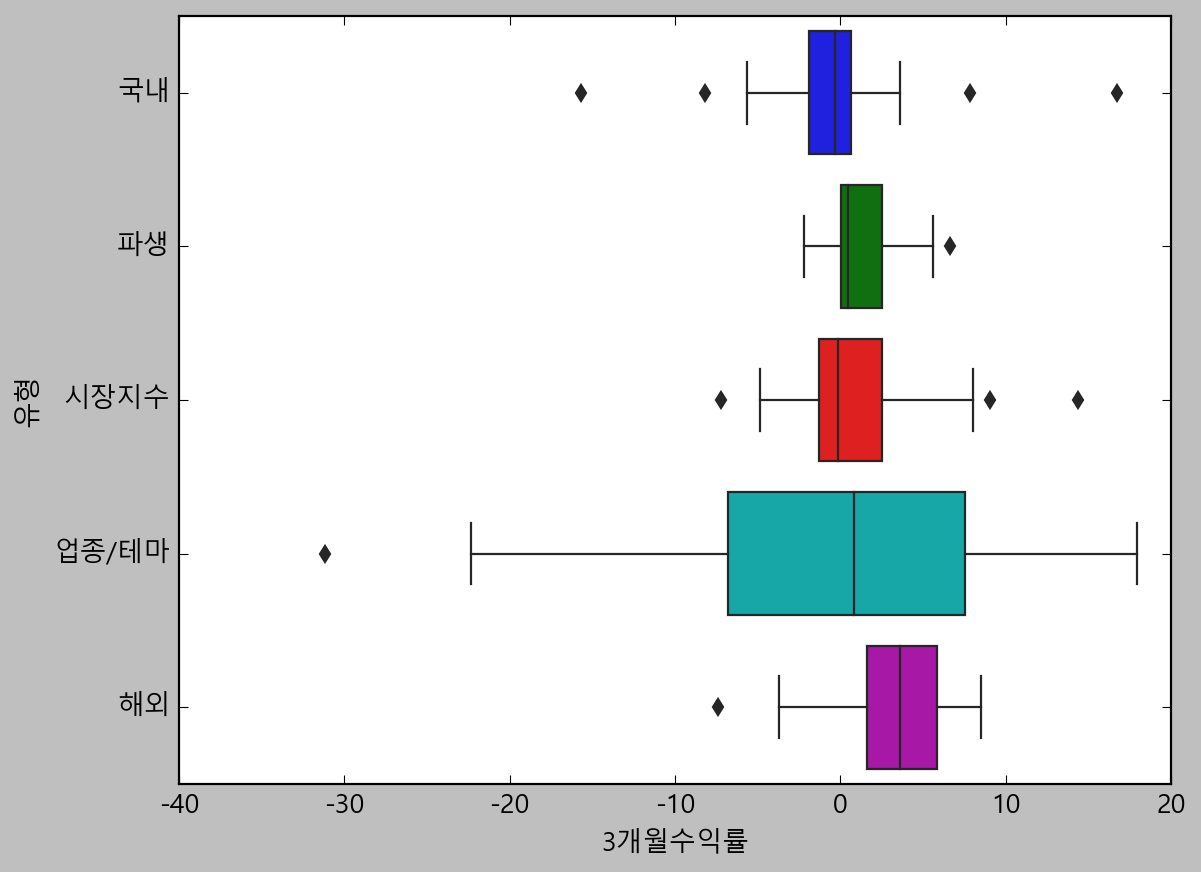

In [107]:
# KODEX의 boxplot을 그립니다. 
sns.boxplot(data=df_kodex, x="3개월수익률", y = '유형')

In [ ]:
# KODEX의 boxplot을 그립니다. 
sns.boxplot(data=df_kodex, x="3개월수익률", y = '유형')